Prendere lucca come origine alle 6 alla mattina di ottobre feriale

Trovare il tempo di percorrenza per ogni destinazione 
    binnare i tempi e se sono sotto 30 minuti vanno colorati di verde
    sopra i 30 di giallo e sopra i 60 di rosso. 
    rifare questo gioco per per due ore in due 
        e rifarlo per castelunovo

Fare i bar plot e poi una mappa
    caricare gli shapefile dei comuni (cercali e se on li trovi chiedi a fabio)

Software
choropleth map folium

TIPS:
Vedere la lezione di unsupervised learning:

https://github.com/fpinell/hands_on_python_for_ds/blob/main/notebooks/2021/Lecture_2_Unsupervised_Learning.ipynb

'/content/drive/Shareddrives/phd_hands_on/clustering_test/Com01012021_g_WGS84.shp'

In [11]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

In [23]:
# Leggo il file di shapes

comuni_shape = gpd.read_file('shapes/Com01012021_g_WGS84.shp',encoding='utf-8')[['COMUNE','geometry']]
comuni_shape

,COMUNE,geometry
0,Agliè,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,Airasca,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,Ala di Stura,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,Albiano d'Ivrea,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,Almese,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...
7898,Villaputzu,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,Villasalto,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,Villasimius,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,Villasor,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


In [24]:
df = pd.read_csv('datasetGenerator/output/routes.csv')
df

,fromPlaceName,fromPalceCord,toPlaceName,toPlaceCord,date,time,available,duration,startTime,endTime,...,walkDistance,walkLimitExceeded,generalizedCost,elevationLost,elevationGained,transfers,fare,url_to_watch,ResponseData,rawOutput
0,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,1:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
1,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,2:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
2,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,3:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
3,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,4:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
4,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,5:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,Lucca,"43.8497093,10.47233955",Pescaglia,"43.9649472,10.41305245",05-09-2023,8:00am,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '05-09-2023', '...",NaN
36476,Lucca,"43.8497093,10.47233955",Pescaglia,"43.9649472,10.41305245",05-09-2023,9:00am,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '05-09-2023', '...",NaN
36477,Lucca,"43.8497093,10.47233955",Pescaglia,"43.9649472,10.41305245",05-09-2023,10:00am,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '05-09-2023', '...",NaN
36478,Lucca,"43.8497093,10.47233955",Pescaglia,"43.9649472,10.41305245",05-09-2023,11:00am,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '05-09-2023', '...",NaN


In [9]:
def plotDataset(df, city, date, time):
    df = df[(df['fromPlaceName'] == city) & (df['date'] == date) & (df['time'] == time) & (df['available'] == True)]
    df.drop(columns=['walkDistance','walkLimitExceeded','generalizedCost','elevationLost','elevationGained','transfers','fare','url_to_watch','ResponseData','rawOutput'], inplace=True)
    if (len(df) == 0):
        return (print('No trips available'))
    df['duration'] = df['duration'].astype(int)
    data = df
    intervalli = [0, 3000, 6000, data['duration'].max()]
    colori = ['g', 'y', 'r']

    data['colore'] = pd.cut(data['duration'], bins=intervalli, labels=colori)
    conteggio_colori = data['colore'].value_counts()
    
    ###
    ### Realizzazione della mappa ###
    ### 
    df_clustering = gb_df[columns].copy()

    gb_df['cluster_id'] = km.labels_
    gb_df.columns = [c.replace('_','-') if c in columns else c for c in gb_df.columns]

    gb_df['lower'] = gb_df['Città\nLocal Alphabet'].apply(lambda x: x.lower())
    df_nuts_geom = pd.merge(gb_df,comuni_shape,on='lower')
    df_nuts_geom['rgba'] = df_nuts_geom.cluster_id.apply(lambda x: get_color(x).lower())
    # clusters = [2]
    gdf_nuts_geom = gpd.GeoDataFrame(df_nuts_geom,geometry='geometry')
    gdf_nuts_geom.dropna(inplace=True)
    # gdf_nuts_geom = gdf_nuts_geom[gdf_nuts_geom.cluster_id.isin(clusters)] 
    m = folium.Map((41.9027835,12.4963655),zoom_start=6)
    folium.GeoJson(
        gdf_nuts_geom,
        style_function=lambda feature: {
            'fillColor': feature['properties']['rgba'],
            'color' : feature['properties']['rgba'],
            'weight' : 0.7,
            'fillOpacity' : 0.5,
            },
        tooltip=folium.GeoJsonTooltip(
            fields=['lower','cluster_id','total'],
            aliases=['Comune','Cluster','Totale imprese'],
            localize=True
        )

        ).add_to(m)


/tmp/ipykernel_39244/1608643391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['walkDistance','walkLimitExceeded','generalizedCost','elevationLost','elevationGained','transfers','fare','url_to_watch','ResponseData','rawOutput'], inplace=True)
/tmp/ipykernel_39244/1608643391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['duration'].astype(int)
/tmp/ipykernel_39244/1608643391.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (3).

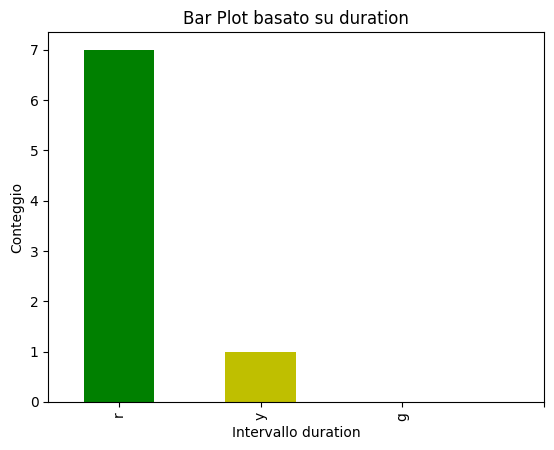

In [10]:
plotDataset(df, 'Lucca', '10-01-2023', '7:00am')